In [0]:
# update pytorch and fastai to latest versions
!pip install torch -U
!pip install torchvision -U
!pip install fastai -U 
!pip install kaggle

In [0]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# mount your google drive so you can save to it
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
os.getcwd()

'/content'

In [0]:
#os.mkdir('blindness_detection')

In [0]:
os.chdir('/content/gdrive/My Drive/projects/')

In [7]:
os.getcwd()

'/content/gdrive/My Drive/projects'

In [8]:
os.listdir()

['blindness_detection']

In [0]:
# create environment variables for kaggle to authenticate with
# os.environ['KAGGLE_USERNAME'] = "insert-here"
# os.environ['KAGGLE_KEY'] = "insert-here"

In [0]:
#!kaggle competitions download -c aptos2019-blindness-detection -p 'blindness_detection'

In [11]:
os.listdir('blindness_detection/')

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb',
 'trial2_aptos.ipynb']

In [0]:
#!unzip 'blindness_detection/train_images.zip' -d 'train_images'
#!unzip 'blindness_detection/test_images.zip' -d 'test_images'

In [0]:
os.chdir('blindness_detection/')

In [14]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'train.csv')
# make a dataframe from test.csv
test_df = pd.read_csv(path/'test.csv')

In [16]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [17]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [0]:
# create a dictionary for the varying levels of diabetic retinopathy
dr_dict = {0: 'No DR', # no diabetic retinopathy,
           1: 'Mild', # mild case of diabetic retinopathy,
           2: 'Moderate', # moderate level of diabetic retinopathy
           3: 'Severe', # severe case of diabetic retinopathy
           4: 'Proliferative DR' # worst case scenario
          }

In [0]:
# create target column that generates more descriptive labels vs. integer values
train_df['target'] = train_df['diagnosis'].map(dr_dict)

In [20]:
train_df.tail()

,id_code,diagnosis,target
3657,ffa47f6a7bf4,2,Moderate
3658,ffc04fed30e6,0,No DR
3659,ffcf7b45f213,2,Moderate
3660,ffd97f8cd5aa,0,No DR
3661,ffec9a18a3ce,2,Moderate


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
target       3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [0]:
# convert target column to categorical type
train_df['target'] = train_df['target'].astype('category')

In [0]:
# drop diagnosis column
train_df.drop(labels='diagnosis', axis=1, inplace=True)

In [24]:
train_df.head()

,id_code,target
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [25]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb',
 'trial2_aptos.ipynb']

In [26]:
train_images_path = path/'images_train'
train_images_path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection/images_train')

In [0]:
# import deep learning libraries
import torch
import fastai
from fastai import *
from fastai.vision import *

data = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=64,
                              bs=16)
       )

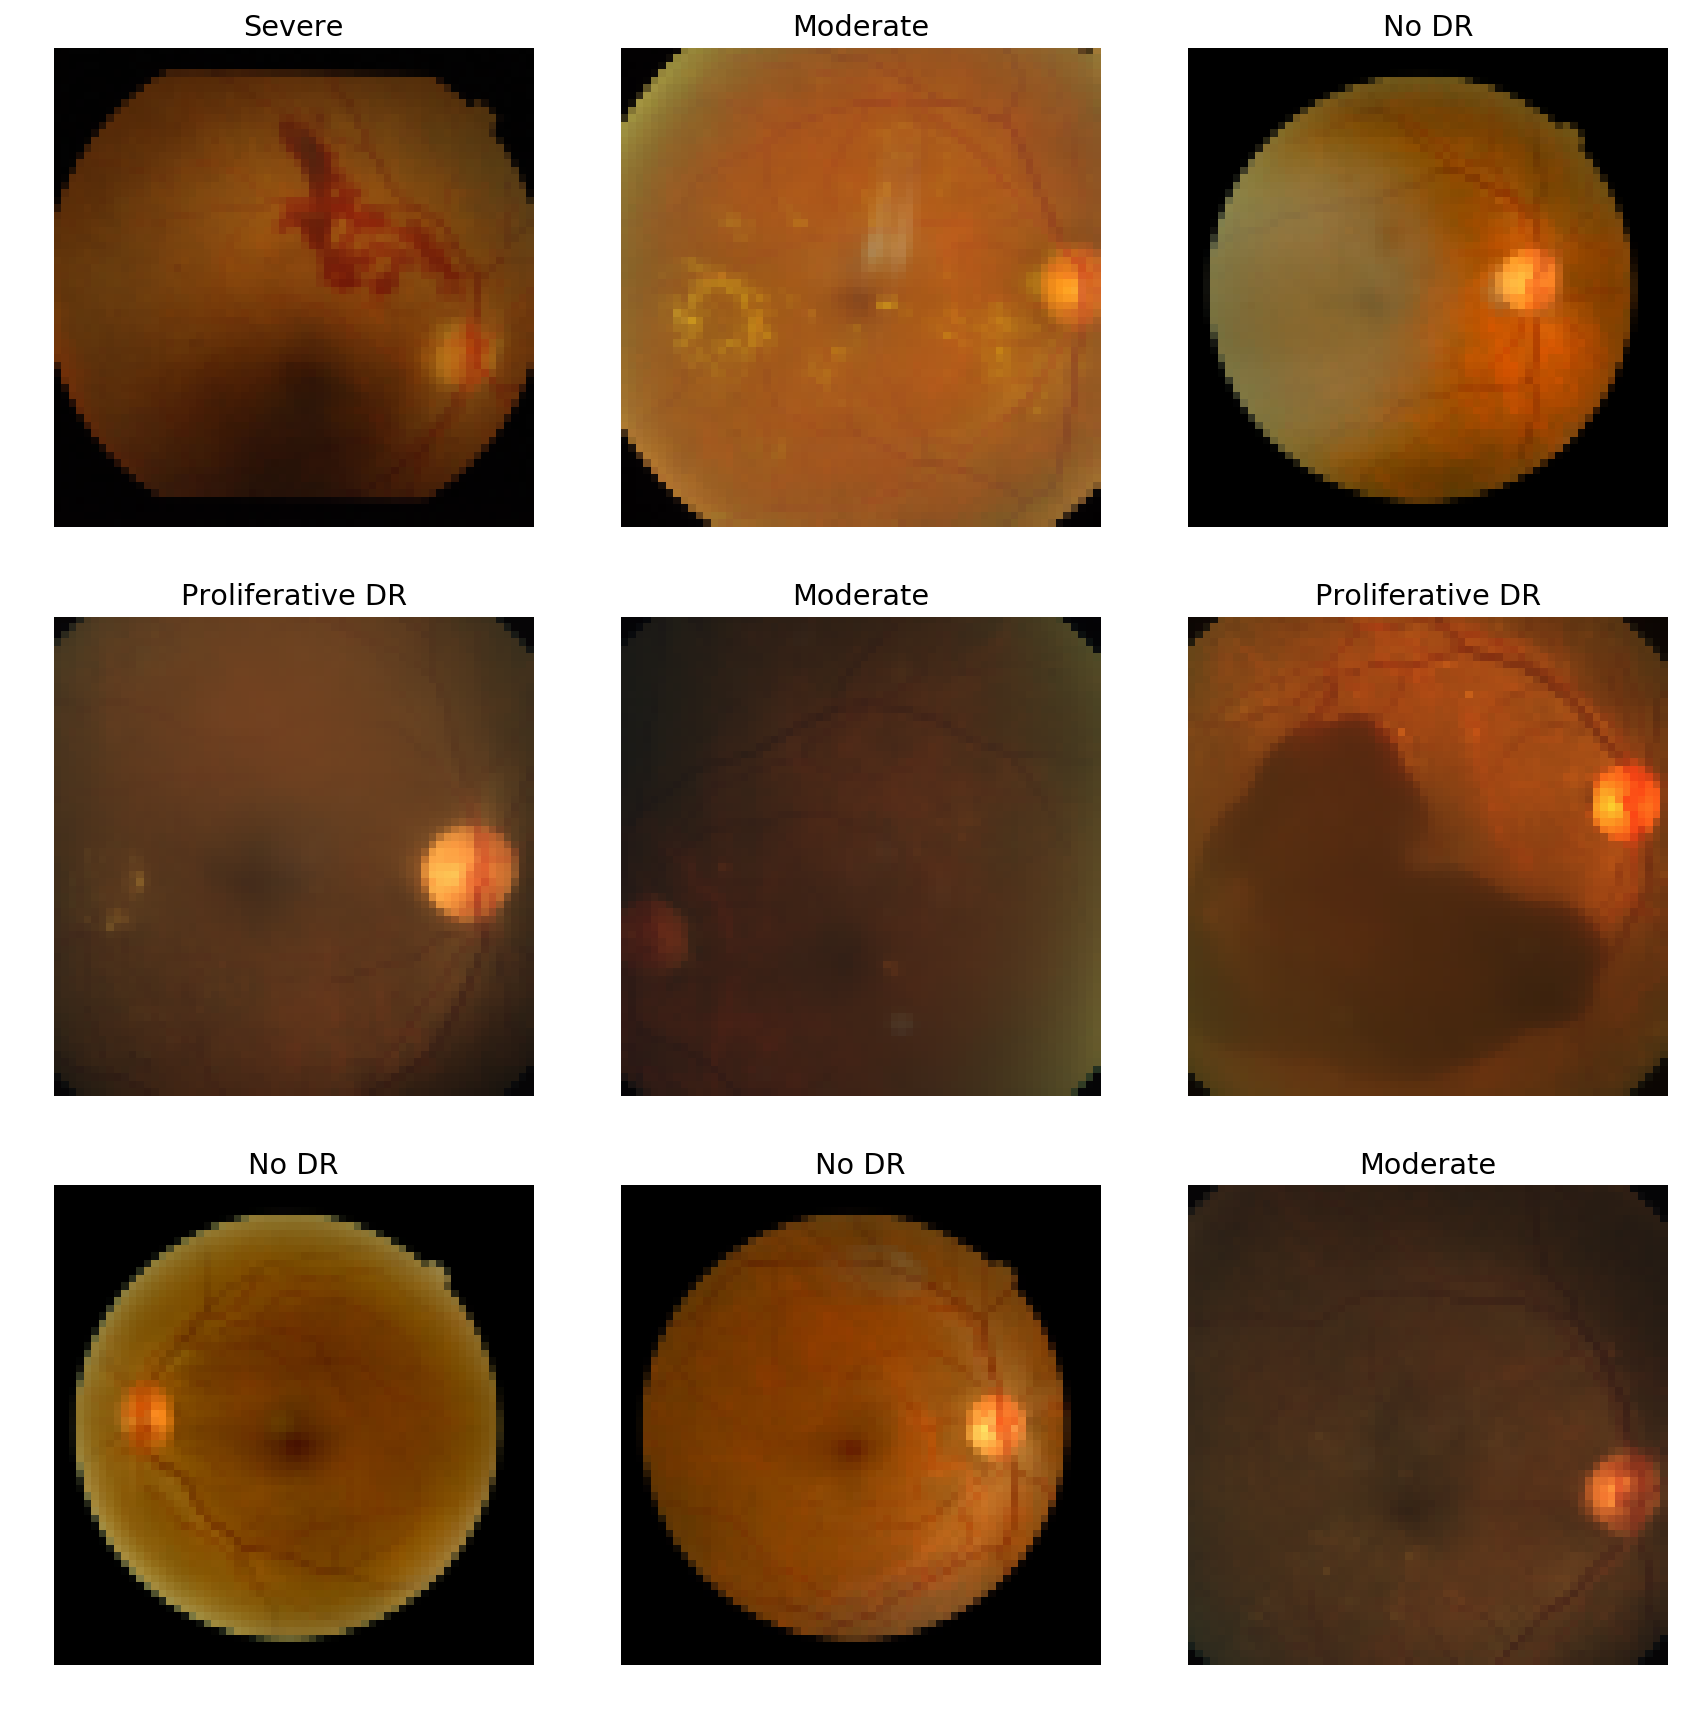

In [28]:
data.show_batch(rows=3)

In [29]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb',
 'trial2_aptos.ipynb']

In [30]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [32]:
data

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: LabelList (1928 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train

# Create Learner and Model Training

In [33]:
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# create Kappa Score metric
kappa = KappaScore()
kappa.weights = "quadratic"

In [35]:
learn = cnn_learner(data, models.densenet121,
                    metrics=[error_rate, kappa, Recall(), Precision()],
                    pretrained=True,
                    bn_final=True,
                    path=path/'models'
                   )

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 30.2MB/s]


In [36]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [37]:
os.getcwd()

'/content/gdrive/My Drive/projects/blindness_detection'

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.29E-01


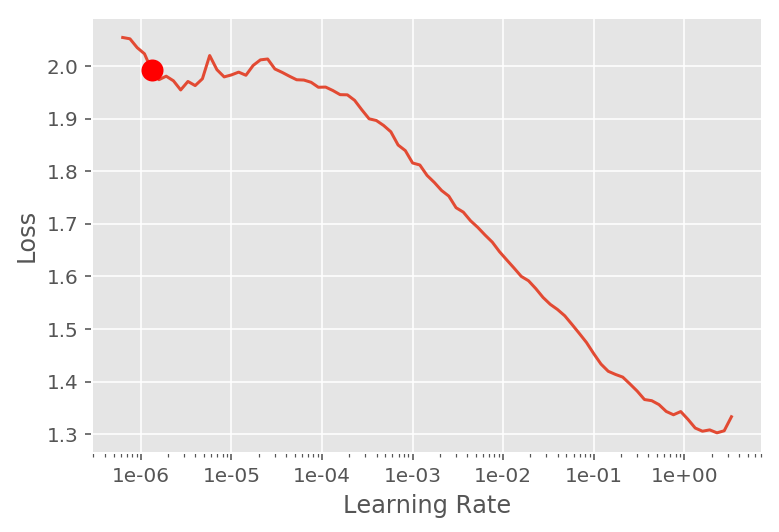

In [39]:
learn.recorder.plot(suggestion=True)

In [40]:
from fastai.callbacks import SaveModelCallback, EarlyStoppingCallback

learn.fit_one_cycle(5, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                    monitor='kappa_score', name='trial3-rd1')),
                                 EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                       min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,1.051298,0.814942,0.262295,0.399562,0.553639,0.549177,17:34
1,0.798192,0.674172,0.218579,0.413789,0.529416,0.649750,07:32
2,0.686052,0.635360,0.211749,0.437073,0.555332,0.621369,07:35
3,0.604264,0.627746,0.198087,0.449824,0.563630,0.658636,07:39
4,0.543509,0.626878,0.202186,0.432784,0.550037,0.665089,07:45


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:189: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 0 with kappa_score value: 0.3995622396469116.
Better model found at epoch 1 with kappa_score value: 0.41378939151763916.
Better model found at epoch 2 with kappa_score value: 0.43707311153411865.
Better model found at epoch 3 with kappa_score value: 0.4498237371444702.


In [0]:
#learn.save('trial2-rd1');

# Increase Image Size to 128

In [0]:
data_128 = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=128,
                              bs=16))

In [42]:
data_128.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Moderate,No DR,No DR,Proliferative DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Moderate,Mild,Severe,No DR,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data_128.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
# feed data_128 into learner
learn.data = data_128

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial3-rd1');

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 1.58E-07


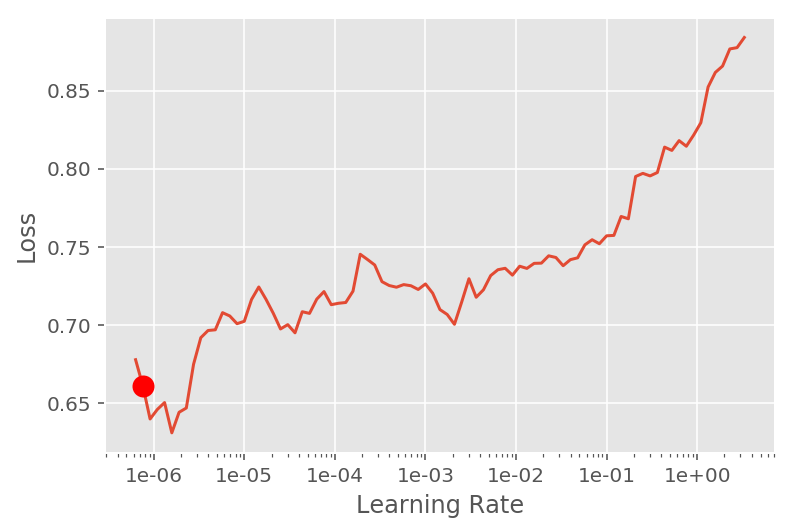

In [49]:
learn.recorder.plot(suggestion=True)

In [50]:
learn.fit_one_cycle(5, learn.recorder.min_grad_lr, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                                                 monitor='kappa_score', name='trial2-rd2')),
                                                              EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                                                    min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.742958,0.635811,0.224044,0.406986,0.516144,0.624012,07:54
1,0.746976,0.643863,0.221311,0.401432,0.515918,0.601029,07:57
2,0.758528,0.639881,0.209016,0.454585,0.533027,0.645296,08:00
3,0.760371,0.629304,0.217213,0.403902,0.526003,0.612944,07:57


Better model found at epoch 0 with kappa_score value: 0.4069860577583313.
Better model found at epoch 2 with kappa_score value: 0.45458531379699707.
Epoch 4: early stopping


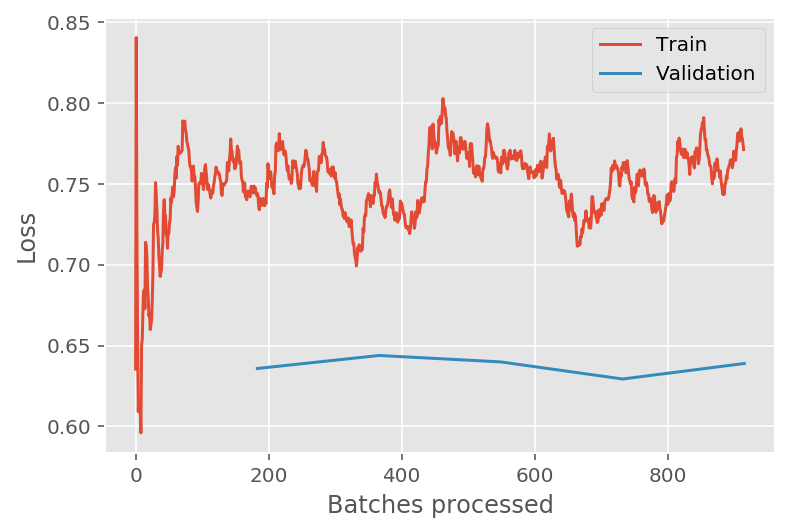

In [51]:
learn.recorder.plot_losses()

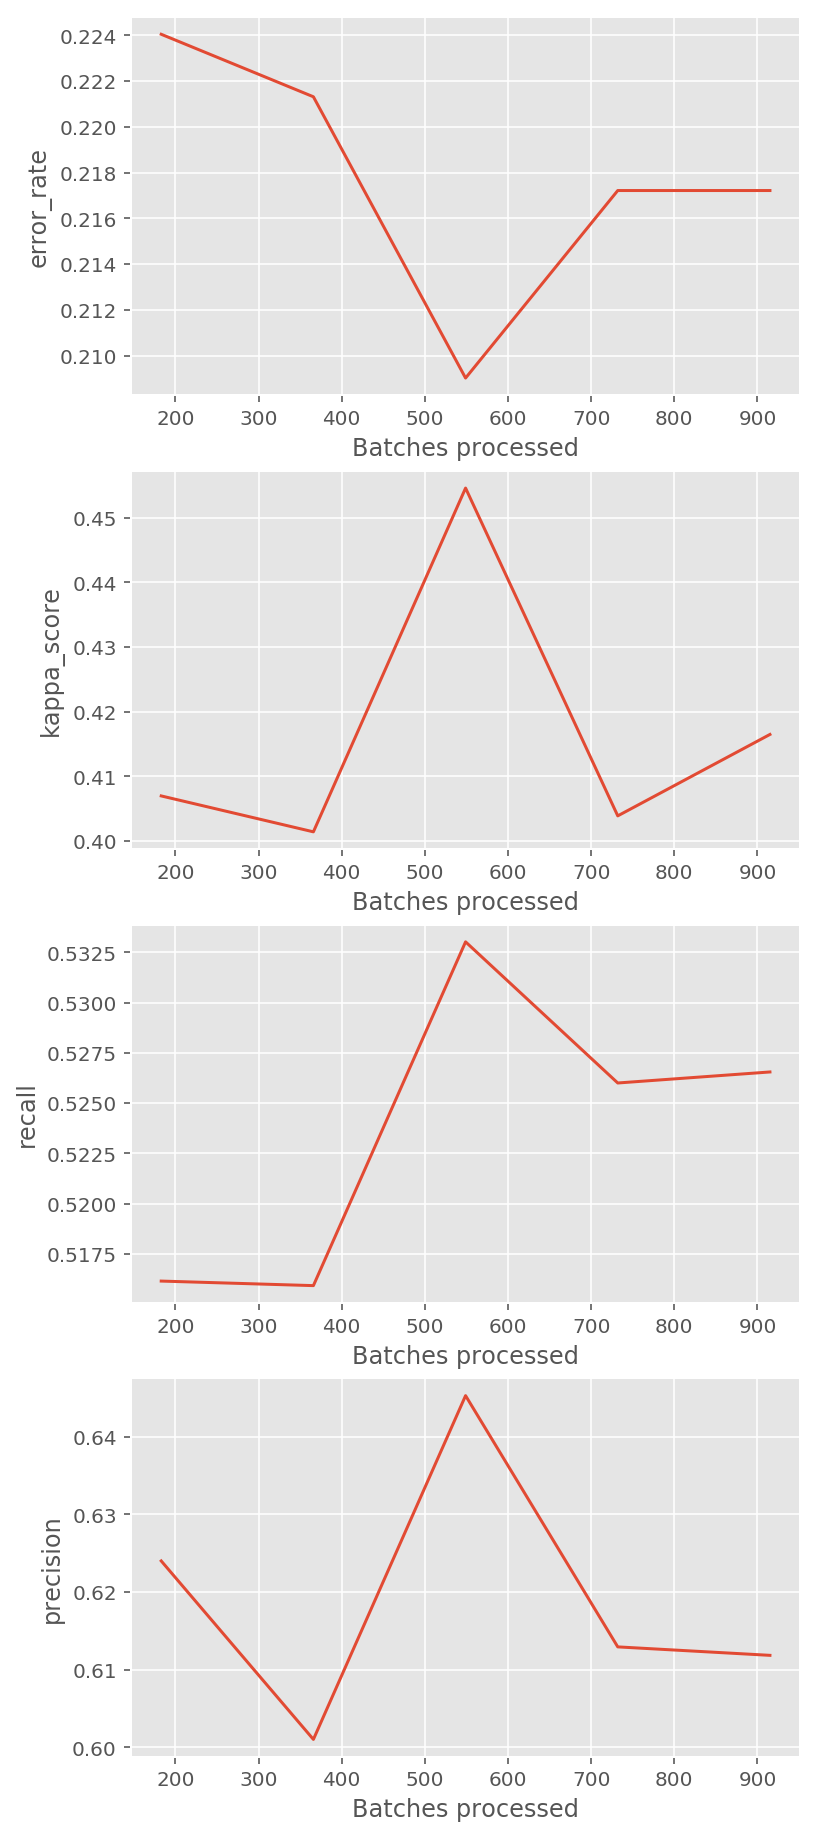

In [52]:
learn.recorder.plot_metrics()

# Interpretation of The Results

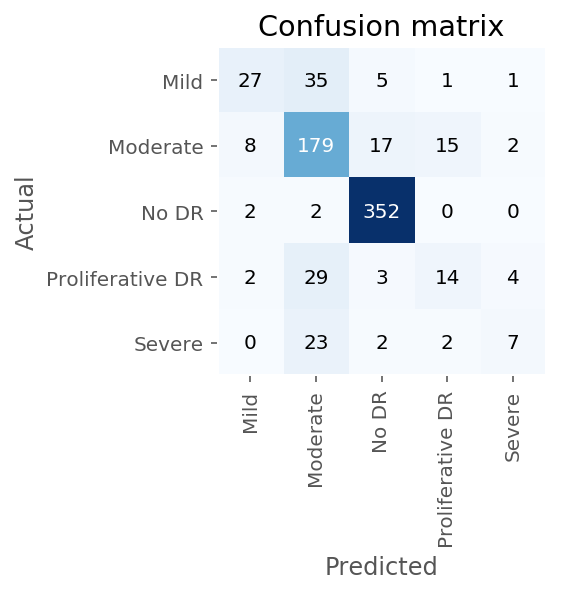

In [53]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()